# Gradient descent, the gory details in numpy

On Tuesday, we spent time deriving the derivation for backprop when the error is calculated using $1/2 \sum_k (t_k - a_k)^2$ , in particular the partial derivatives for:
1. error with respect to activation: $\frac{\partial E}{\partial a_k} = \frac{\partial(1/2(t_k-a_k)^2)}{\partial a_k} = -(t_k - a_k) = a_k - t_k$
where $t_k$ is the gold / truth output and $a_k$ is the output activation for data point $k$.  
2. activation with respect to the net input: $\frac{\partial a_k}{\partial net_k} = \frac{\partial(1 + e^{-net_k})^{-1}}{\partial net_k} = \frac{e^{-net_k}}{(1 + e^{-net_k})^2}$ (assuming the sigmoid: $\frac{1}{1+e^{-x}}$).
3. net input with respect to a weight: $\frac{\partial net_k}{\partial w_{kj}} = \frac{\partial(w_{kj}a_j)}{\partial w_{kj}} = a_j$.

Now we will provide a numpy-only code implementation courtesy of http://neuralnetworksanddeeplearning.com/chap2.html. Note that this book provides slightly more general partial derivatives for backpropagation because it doesn't assume a sigmoid activation or particular loss function. The four rules as outlined in this book are:
1. with respect to activation for output layer: $\delta^L = \frac{\partial E}{\partial a_k^L} \sigma^\prime$ for activation function $\sigma$
2. with respect to activation for prior-to-output layer: $\delta^l = \frac{\partial E}{\partial a_k^l} = ((w^{l+1})^T \delta^{l+1}) \odot \sigma^\prime$ (note this incorporates both net input and activation)
3. for weight: $\frac{\partial E}{\partial w_{jk}^l} = a_k^{l-1} \delta_j^l$
4. for bias: $\frac{\partial E}{\partial b_j^l} = \delta_j^l$


In [ ]:
import numpy as np

def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""

        # set up the gradient arrays
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        activation = x

        # we cache the calculated netins and activations
        # as the textbook says, this activation storage can make memory usage while training a deep neural network much bigger than that necessary when running it
        # list to store all the netin vectors, layer by layer
        netins = []
        # list to store all the activations, layer by layer
        activations = [x] 

        # forward pass
        for b, w in zip(self.biases, self.weights):
            netin = np.dot(w, activation)+b
            netins.append(netin)
            # sigmoid activation
            activation = sigmoid(netin)
            activations.append(activation)

        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def sigmoid(z):
        """The sigmoid function."""
        return 1.0/(1.0+np.exp(-z))

    def sigmoid_prime(z):
        """Derivative of the sigmoid function."""
        return sigmoid(z)*(1-sigmoid(z))

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x \partial a for the output activations."""
        return (output_activations-y) 


I strongly recommend reading the chapter from the book above, as the "demon" analogy works pretty well.

One final note (for now!) on implementations of backpropagation: deep learning libraries provide "autograd" implementations. Here for example is a brief introduction to autograd in python: https://d2l.ai/chapter_preliminaries/autograd.html.


 # Vanishing and exploding gradients

In a deep network, the gradients for early layers will be the result of multiple matrix multiplications, of very small fractions. The product may therefore "vanish" (become too small for representation) or "explode" (suddenly become too large).

Here are depictions of the first-order gradients of some activation functions: 
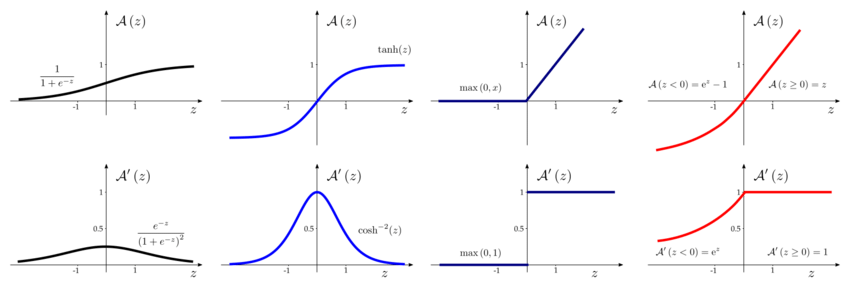
(from https://www.researchgate.net/figure/Some-of-the-most-common-activation-functions-and-their-first-order-gradient-From-left-to_fig4_346898697)

One way to deal with these issues is through careful parameter initialization. Consider:
* what happens if all weights and biases are initially set to zero?
* what happens if you just set them to random numbers?

One method for initializing parameters carefully is Xavier initialization, in which weights are sampled from a Gaussian with zero mean and variance $\sigma^2$. We will see a couple of others as we progress through this course.

*Look back at the models you and we have implemented so far: how did you initialize the weights and biases?*

